## Import Libraries && Read Data 

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor

In [2]:
# reading data
unprocessed_data = pd.read_csv("../dataset/HDFCBANK.csv")

In [3]:
unprocessed_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [4]:
# describe and info
unprocessed_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1007.093884,1007.472767,1019.986939,993.822211,1007.364003,1007.330390,1006.929263,2.102580e+06,2.448837e+14,82923.625407,1.261883e+06,0.595003
std,635.757762,635.461516,641.444674,629.502818,635.722752,635.675021,635.481917,3.970048e+06,4.778103e+14,93575.061741,2.070127e+06,0.121337
min,157.400000,162.150000,167.900000,157.000000,163.000000,163.400000,161.400000,1.042000e+03,2.291142e+10,807.000000,4.631000e+03,0.177900
25%,479.912500,482.112500,486.912500,473.100000,480.700000,480.200000,479.512500,3.058325e+05,1.640025e+13,26850.500000,2.624830e+05,0.517800
50%,934.750000,939.350000,953.950000,922.175000,935.600000,935.725000,937.455000,9.444650e+05,1.150443e+14,44227.000000,6.271970e+05,0.600200
75%,1421.000000,1423.525000,1440.000000,1399.000000,1422.812500,1421.000000,1420.567500,2.123647e+06,2.154477e+14,104139.250000,1.433151e+06,0.674000
max,2565.800000,2566.000000,2583.300000,2553.700000,2563.000000,2565.800000,2570.700000,1.005650e+08,1.426400e+16,790631.000000,6.669683e+07,1.000000


In [5]:
# drop nan columns
unprocessed_data.drop(columns=["Trades", "Deliverable Volume", "%Deliverble"], inplace=True)

In [6]:
unprocessed_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


In [7]:
unprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5306 non-null   object 
 1   Symbol      5306 non-null   object 
 2   Series      5306 non-null   object 
 3   Prev Close  5306 non-null   float64
 4   Open        5306 non-null   float64
 5   High        5306 non-null   float64
 6   Low         5306 non-null   float64
 7   Last        5306 non-null   float64
 8   Close       5306 non-null   float64
 9   VWAP        5306 non-null   float64
 10  Volume      5306 non-null   int64  
 11  Turnover    5306 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 497.6+ KB


In [8]:
# symbol series drop
unprocessed_data.drop(columns=["Symbol", "Series"], inplace=True)

In [9]:
# null values
unprocessed_data.isna().sum()

Date          0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64

In [10]:
# shape of data
unprocessed_data.shape


(5306, 10)

## PROCESSING DATE

In [33]:
# copy the data
semi_processed_data = unprocessed_data.copy()

In [34]:
# datetime to index
semi_processed_data["Date"] = pd.to_datetime(semi_processed_data["Date"])

In [35]:
semi_processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5306 non-null   datetime64[ns]
 1   Prev Close  5306 non-null   float64       
 2   Open        5306 non-null   float64       
 3   High        5306 non-null   float64       
 4   Low         5306 non-null   float64       
 5   Last        5306 non-null   float64       
 6   Close       5306 non-null   float64       
 7   VWAP        5306 non-null   float64       
 8   Volume      5306 non-null   int64         
 9   Turnover    5306 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 414.7 KB


In [36]:
semi_processed_data.set_index(semi_processed_data["Date"], inplace=True)

In [37]:
semi_processed_data.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,
2000-01-03,2000-01-03,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
2000-01-04,2000-01-04,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2000-01-05,2000-01-05,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
2000-01-06,2000-01-06,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
2000-01-07,2000-01-07,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


In [38]:
semi_processed_data.drop("Date", axis=1, inplace=True)

In [39]:
# look at the dtyes
semi_processed_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prev Close  5306 non-null   float64
 1   Open        5306 non-null   float64
 2   High        5306 non-null   float64
 3   Low         5306 non-null   float64
 4   Last        5306 non-null   float64
 5   Close       5306 non-null   float64
 6   VWAP        5306 non-null   float64
 7   Volume      5306 non-null   int64  
 8   Turnover    5306 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 414.5 KB


In [40]:
semi_processed_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,
2000-01-03,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
2000-01-04,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2000-01-05,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
2000-01-06,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
2000-01-07,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


## EXPLORATORY DATA ANALYSIS

In [41]:
# exp_data copy
exp_data = semi_processed_data.copy()

In [42]:
exp_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,
2000-01-03,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11
2000-01-04,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12
2000-01-05,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12
2000-01-06,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12
2000-01-07,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12


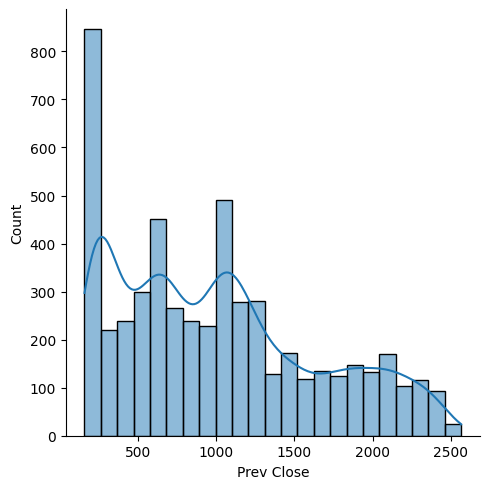

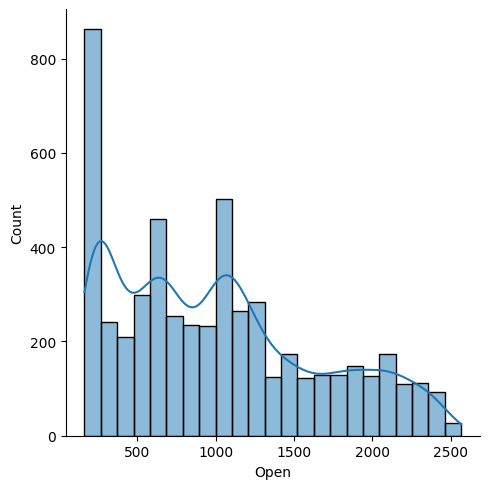

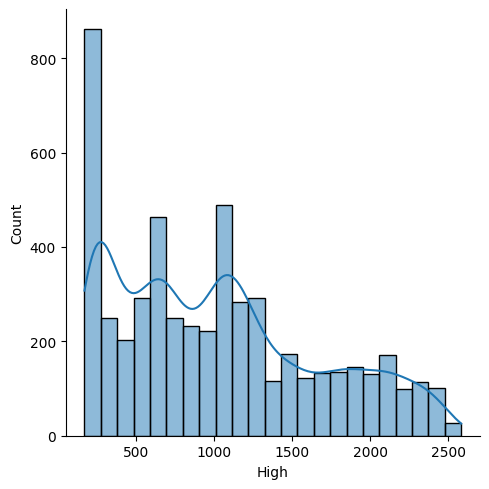

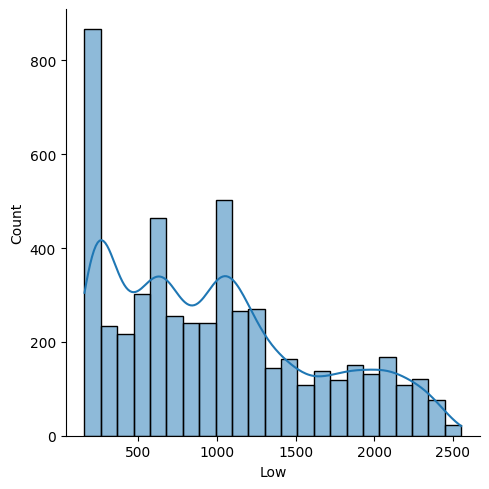

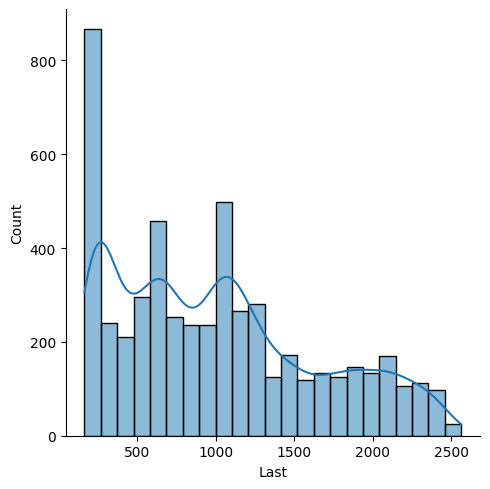

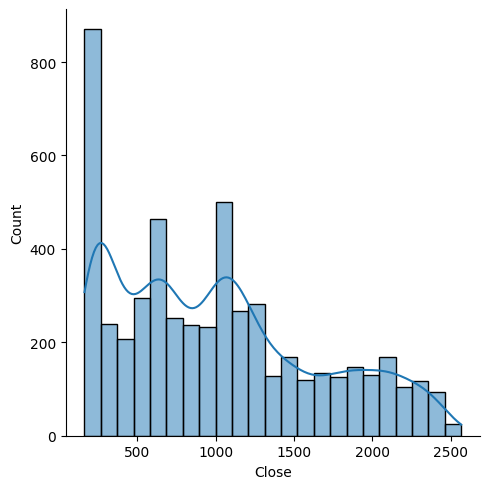

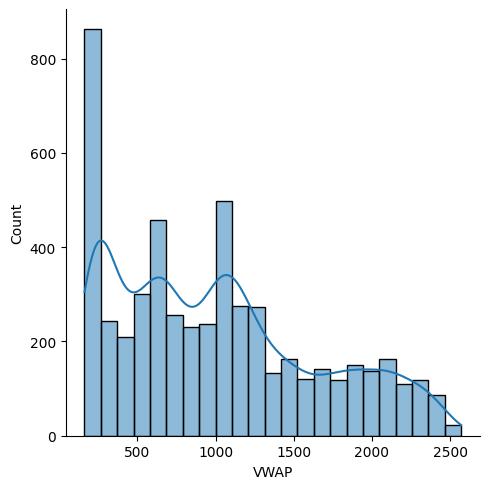

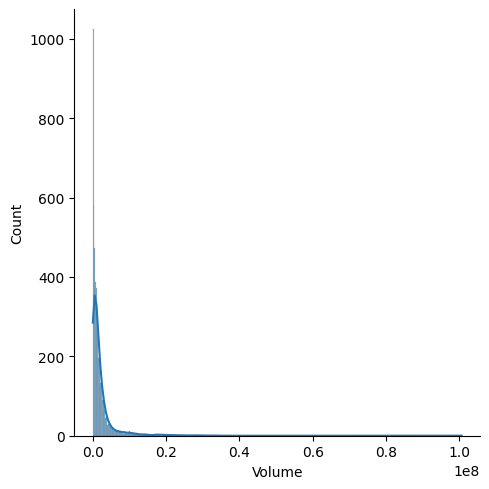

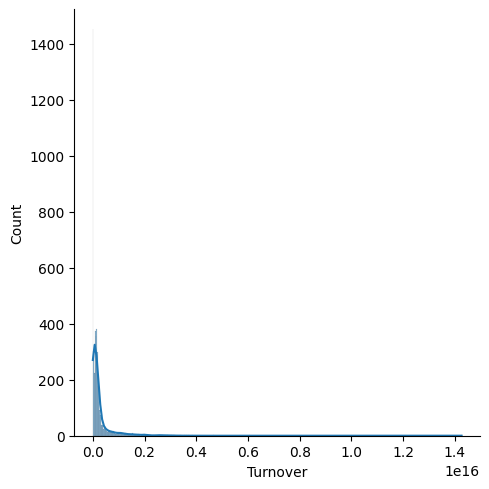

In [47]:
# density plots
for col in exp_data.columns:

    sns.displot(data=exp_data, x=exp_data[col], kde=True)
    plt.show()

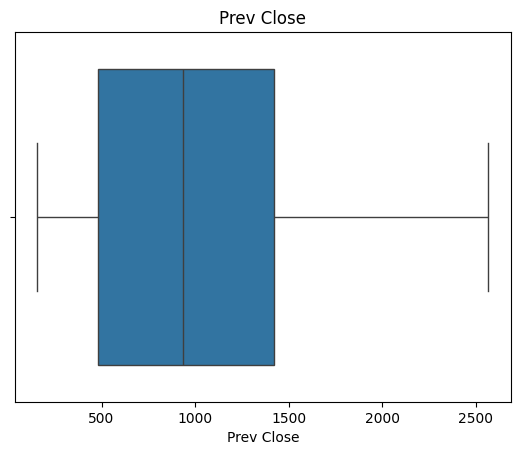

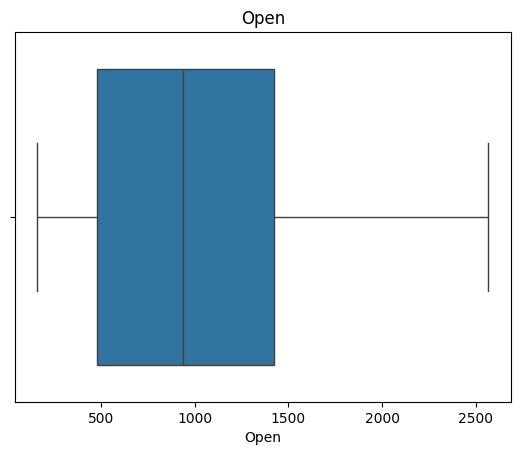

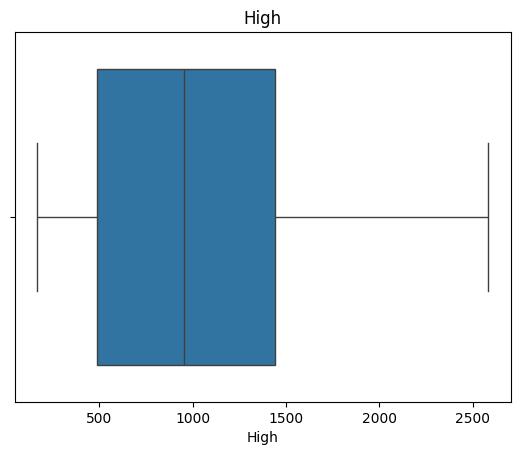

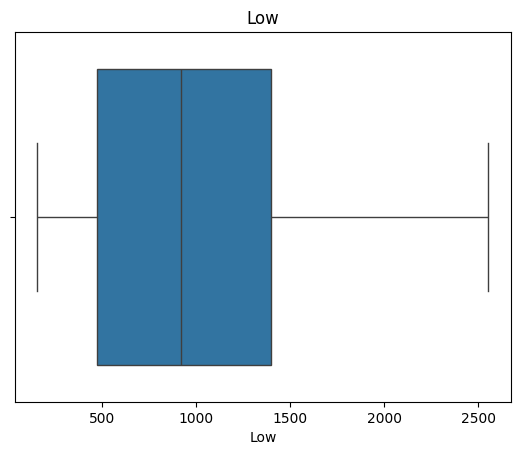

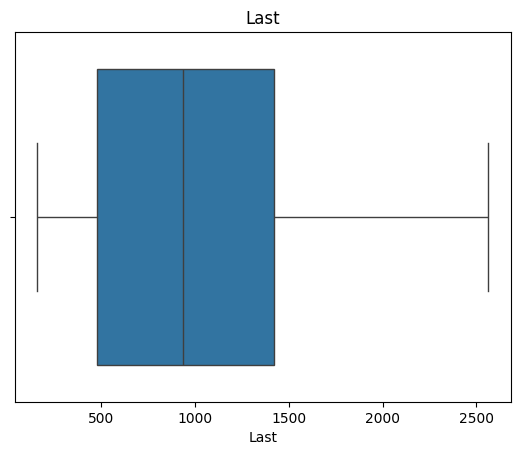

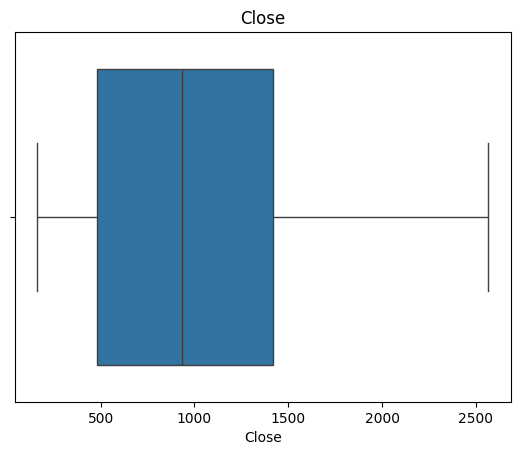

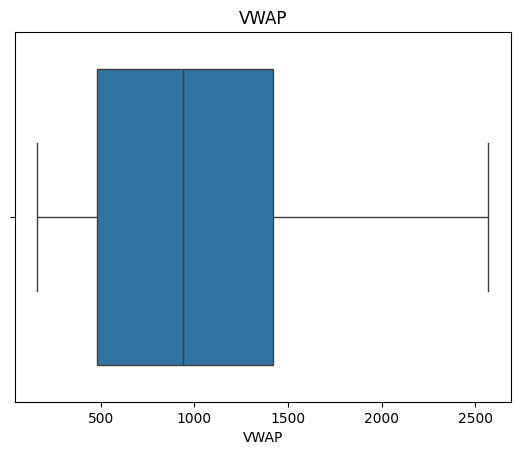

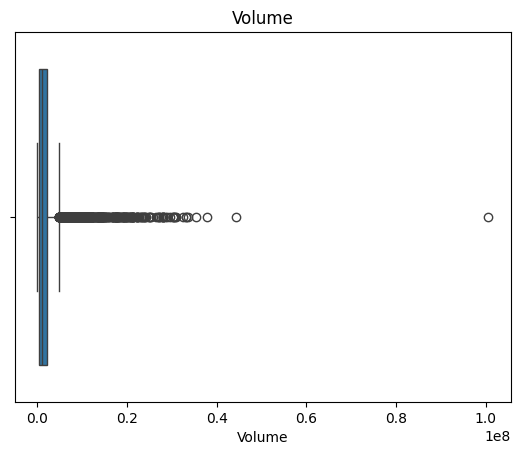

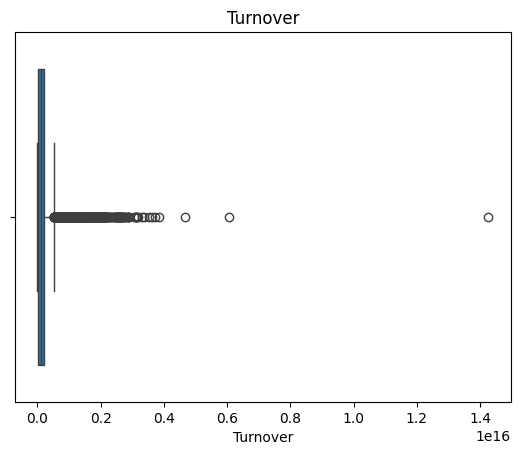

In [51]:
# volume and turnover have outliers
# box plots
for col in exp_data.columns:
    sns.boxplot(data=exp_data, x=col)
    plt.title(f"{col}")
    plt.show()

In [52]:
# drop volumes and turnover
exp_data.drop(["Volume", "Turnover"], axis=1, inplace=True)

In [53]:
# head
exp_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP
Date,,,,,,,
2000-01-03,157.40,166.00,170.00,166.00,170.00,170.00,169.52
2000-01-04,170.00,182.00,183.45,171.00,174.00,173.80,174.99
2000-01-05,173.80,170.00,173.90,165.00,168.00,166.95,169.20
2000-01-06,166.95,168.00,170.00,165.30,168.95,168.30,168.44
2000-01-07,168.30,162.15,171.00,162.15,170.75,168.35,166.79


In [54]:
# we're gonna use prev close and close prices

<Axes: >

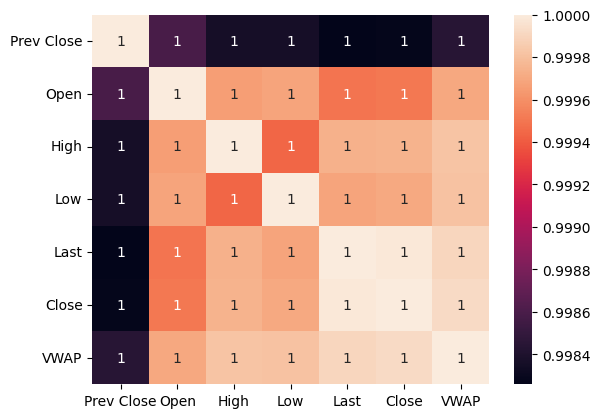

In [55]:
# correlation matrix
sns.heatmap(exp_data.corr(), annot=True)

### DATA PREPROCESSING && MODELS

In [ ]:
# preprocessing
# we're gonna use prev close and close values
# close value is -> y
# prevclose -> X

In [57]:
preprocess_data = exp_data.copy()

In [58]:
X = preprocess_data["Prev Close"].values
y = preprocess_data["Close"].values

In [59]:
# shape control 
X.shape, y.shape

((5306,), (5306,))

In [62]:
# train test split
X_train, X_test, y_train , y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [63]:
X_train.shape, y_train.shape

((3714,), (3714,))

**Model Evaluate Function**

In [91]:
def model_evaluate(model, test_x, true_y, model_name: str):
    model = model
    predicted = model.predict(test_x)

    # evaluate scores
    r2 = r2_score(true_y, predicted)
    rmse = mean_squared_error(true_y, predicted)**0.5
    print(f"R^2 Score: {r2}\nRMSE Score:{rmse}")

    # plotting
    plt.plot(true_y[:100])
    plt.plot(predicted[:100], color="red")
    plt.legend(labels=["True", "Predicted"])
    plt.show()

    # insert to dataframe
    return pd.DataFrame({model_name+"-r2":r2, model_name+"-rmse": rmse}, index=[0])

**LINEAR MODEL**

In [92]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

R^2 Score: 0.992761711612865
RMSE Score:53.951011671000956


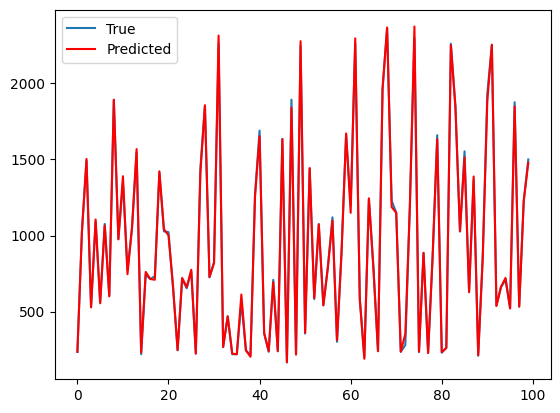

In [93]:
linear_model = model_evaluate(model=lr, model_name="Linear Model", test_x=X_test.reshape(-1, 1), true_y=y_test.reshape(-1, 1))

In [71]:
linear_model.head()

,Linear Model-r2,Linear Model-rmse
0,0.992762,53.951012


**RANDOM FOREST REGRESSOR**

In [73]:
random_forest_regressor = RandomForestRegressor(n_estimators=150, n_jobs=4, max_depth=20)
random_forest_regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

/home/charon5/ML_AI/machine_learning_ai/venv/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=20, n_estimators=150, n_jobs=4)

R^2 Score: 0.9924179506261213
RMSE Score:55.21727317403007


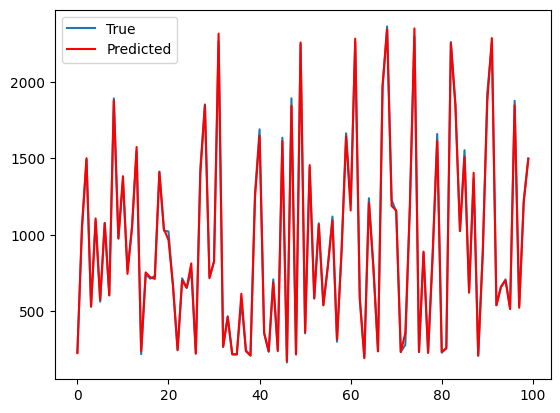

In [94]:
rf_model = model_evaluate(model=random_forest_regressor, model_name="Random FOrests", test_x=X_test.reshape(-1, 1), true_y=y_test.reshape(-1, 1))

**KNNREGRESSOR**

In [97]:
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

KNeighborsRegressor(n_neighbors=2)

R^2 Score: 0.9924255606810212
RMSE Score:55.18955560374348


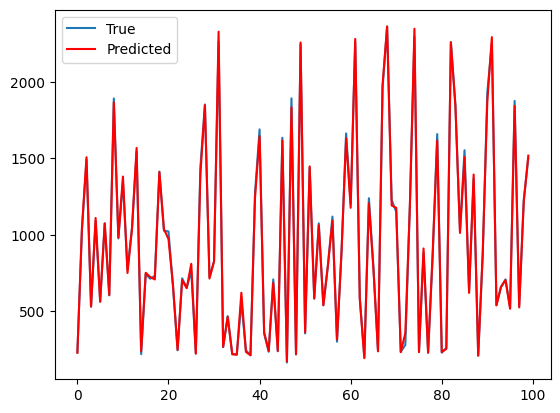

In [98]:
knn_mod = model_evaluate(model=knn_model, model_name="KNN", test_x=X_test.reshape(-1, 1), true_y=y_test.reshape(-1, 1))

**SVR**

In [99]:
sv_regressor = SVR(kernel="rbf", C=2)
sv_regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

/home/charon5/ML_AI/machine_learning_ai/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=2)

R^2 Score: 0.9715436900038888
RMSE Score:106.972203876048


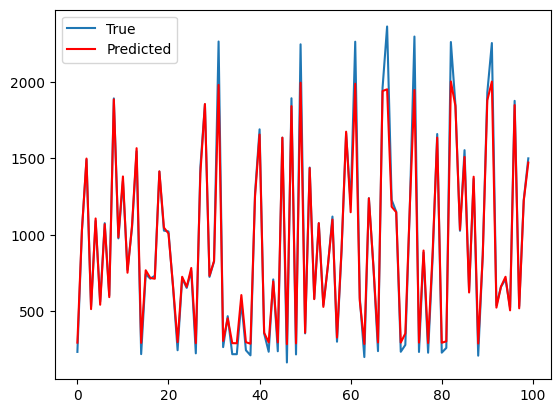

In [100]:
sv_regression_model = model_evaluate(model=sv_regressor, model_name="SVR", test_x=X_test.reshape(-1, 1), true_y=y_test.reshape(-1, 1))

In [105]:
# four models evaluation
scores_ml = pd.concat([sv_regression_model, knn_mod, rf_model, linear_model], axis=1)

In [106]:
scores_ml

,SVR-r2,SVR-rmse,KNN-r2,KNN-rmse,Random FOrests-r2,Random FOrests-rmse,Linear Model-r2,Linear Model-rmse
0,0.971544,106.972204,0.992426,55.189556,0.992418,55.217273,0.992762,53.951012


**ARIMA**

In [108]:
history = [x for x in y_train]
predictions = list()
# walk-forward validation
for t in range(len(y_test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = y_test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=807.620573, expected=234.300000
predicted=803.828540, expected=1030.450000
predicted=933.749626, expected=1492.000000
predicted=980.386549, expected=530.400000
predicted=805.711629, expected=1090.950000
predicted=741.297057, expected=563.150000
predicted=864.147281, expected=1076.450000
predicted=946.170720, expected=604.650000
predicted=908.727863, expected=1892.600000
predicted=935.502403, expected=976.900000
predicted=1060.032844, expected=1351.750000
predicted=1031.758466, expected=770.750000
predicted=1139.504607, expected=1049.300000
predicted=1100.913438, expected=1546.500000
predicted=1274.557523, expected=219.750000
predicted=996.476557, expected=742.350000
predicted=912.345524, expected=713.300000
predicted=885.836159, expected=732.350000
predicted=826.851952, expected=1414.150000
predicted=879.827109, expected=1027.550000
predicted=818.685266, expected=1022.250000
predicted=917.102054, expected=657.300000
predicted=939.288138, expected=245.150000
predicted=856.5814

KeyboardInterrupt: 

Test RMSE: 685.739


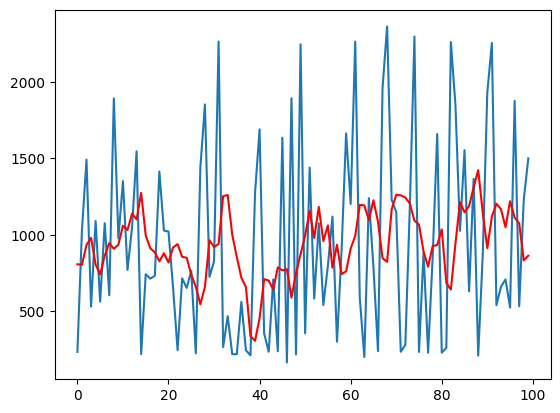

In [113]:
# evaluate forecasts
rmse = (mean_squared_error(y_test[:len(predictions)], predictions))**0.5
r2 = r2_score(y_test[:len(predictions)], predictions)
scores_ml["ARIMA-rmse"] = rmse
scores_ml["ARIMA-r2"] = r2
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(y_test[:100])
plt.plot(predictions[:100], color='red')
plt.show()

In [114]:
scores_ml

,SVR-r2,SVR-rmse,KNN-r2,KNN-rmse,Random FOrests-r2,Random FOrests-rmse,Linear Model-r2,Linear Model-rmse,ARIMA-rmse,ARIMA-r2
0,0.971544,106.972204,0.992426,55.189556,0.992418,55.217273,0.992762,53.951012,685.738717,-0.159547


## ARTIFICIAL NEURAL NETWORK

In [127]:
from keras.layers import *
from keras.losses import MeanSquaredError
from keras.models import Sequential

In [181]:
ann_model = Sequential()
ann_model.add(InputLayer(X_train.reshape(-1, 1).shape))
ann_model.add(Dense(800, activation="relu"))
ann_model.add(Dense(800, activation="relu"))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(800, activation="relu"))
ann_model.add(Dense(1, activation="linear"))
ann_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 3714, 800)         1600      
                                                                 
 dense_26 (Dense)            (None, 3714, 800)         640800    
                                                                 
 dropout_6 (Dropout)         (None, 3714, 800)         0         
                                                                 
 dense_27 (Dense)            (None, 3714, 800)         640800    
                                                                 
 dense_28 (Dense)            (None, 3714, 1)           801       
                                                                 
Total params: 1284001 (4.90 MB)
Trainable params: 1284001 (4.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [182]:
ann_model.compile(loss="mae", optimizer="adam")

In [183]:
history_ann = ann_model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1), epochs=150)

Epoch 1/150
117/117 [==============================] - 1s 3ms/step - loss: 97.7394
Epoch 2/150
117/117 [==============================] - 0s 2ms/step - loss: 49.1908
Epoch 3/150
117/117 [==============================] - 0s 2ms/step - loss: 51.6257
Epoch 4/150
117/117 [==============================] - 0s 2ms/step - loss: 56.7455
Epoch 5/150
117/117 [==============================] - 0s 2ms/step - loss: 46.9611
Epoch 6/150
117/117 [==============================] - 0s 2ms/step - loss: 53.4647
Epoch 7/150
117/117 [==============================] - 0s 2ms/step - loss: 53.2235
Epoch 8/150
117/117 [==============================] - 0s 2ms/step - loss: 48.6557
Epoch 9/150
117/117 [==============================] - 0s 2ms/step - loss: 48.0195
Epoch 10/150
117/117 [==============================] - 0s 3ms/step - loss: 48.2683
Epoch 11/150
117/117 [==============================] - 0s 2ms/step - loss: 47.0988
Epoch 12/150
117/117 [==============================] - 0s 2ms/step - loss: 46.5265
E

In [184]:
predicted_ann = ann_model.predict(X_test.reshape(-1,1))

50/50 [==============================] - 0s 1ms/step


In [185]:
rmse

119701.24436613386

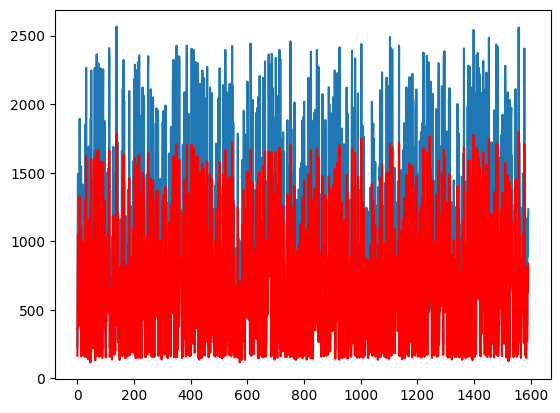

In [186]:
plt.plot(y_test)
plt.plot(predicted_ann.reshape(-1, 1), color="red")
plt.show()

In [187]:
r2 = r2_score(y_true=y_test, y_pred=predicted_ann.reshape(-1, 1))

In [188]:
r2

0.6892546166691469

In [189]:
scores_ml["ANN-r2"] = r2
scores_ml["ANN-rmse"] = rmse

<Axes: title={'center': 'R2_Scores'}>

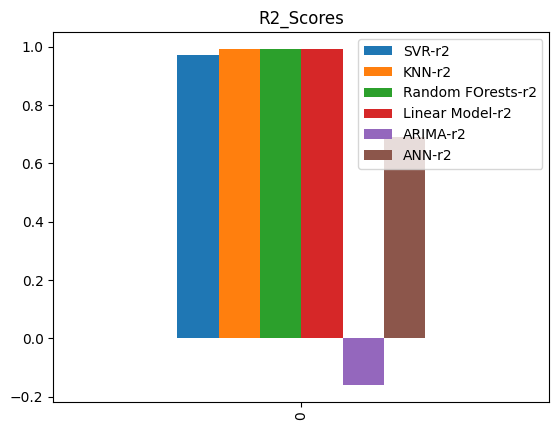

In [190]:
r2_scores = scores_ml[scores_ml.axes[1][scores_ml.axes[1].str.contains("r2")]]
r2_scores.plot(kind="bar", title="R2_Scores")

<Axes: title={'center': 'Root Mean Square Metrics'}>

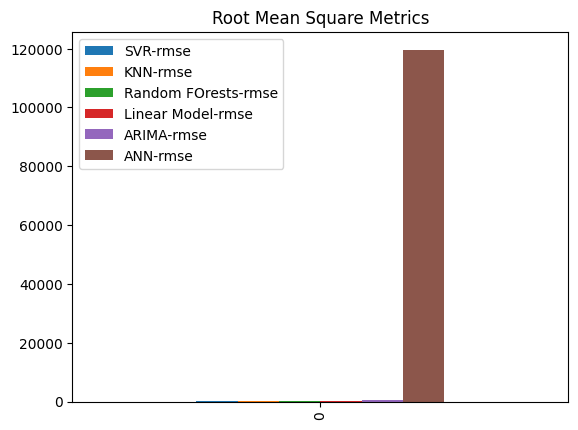

In [191]:
rmse_scores = scores_ml[scores_ml.axes[1][scores_ml.axes[1].str.contains("rmse")]]
rmse_scores.plot(kind="bar", title="Root Mean Square Metrics")